# WeatherPy
1. Temperature is at it's highest when moving toward the equator from either the north or south.
2. The Southern hemisphere appears to have a higher temperature this time of year versus the northern hemisphere.
3. The relationship between humidity and latitude appears flat, as there is no movement up or down when at different latitudes. At a latitude of ten, humidity level can be as low as 10 and as high as 90.
4. The same can be said for cloudiness, and wind speed when compared to latitude. The relationship appear flat for both. Wind speeds are typically between 0-15 regardless of latitude.  While cloudiness is all over the range regardless of latitude. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
!pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#OpenWeather Key
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=09dc07dff435a48cb9c215ed52622958&units=imperial&q=


In [5]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | lichinga
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 7 of Set 1 | sobolevo
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | lohja
Processing Record 11 of Set 1 | beloha
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | denpasar
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | tecpan
Processing Record 17 of Set 1 | sinegorye
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | maldonado
Processing Record 21 of Set 1 | laguna de perlas
Processing Record 22 of Set 1 | ugoofaaru
Processing Record 23 of Set 1 | saint-philippe
Processing Record 24 

Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | baykit
Processing Record 45 of Set 4 | praia
Processing Record 46 of Set 4 | marang
Processing Record 47 of Set 4 | port lincoln
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | burnie
Processing Record 1 of Set 5 | salinopolis
Processing Record 2 of Set 5 | nizhnyaya omka
Processing Record 3 of Set 5 | sibolga
Processing Record 4 of Set 5 | karpathos
Processing Record 5 of Set 5 | joshimath
Processing Record 6 of Set 5 | marathon
Processing Record 7 of Set 5 | rundu
Processing Record 8 of Set 5 | chokurdakh
Processing Record 9 of Set 5 | labuhan
Processing Record 10 of Set 5 | kahului
Processing Record 11 of Set 5 | nanortalik
Processing Record 12 of Set 5 | ous
Processing Record 13 of Set 5 | honningsvag
City not found. Skipping...
Processing Record 14 of Set 5 | tuy hoa
Processing Record 15 of Set 5 | surt
Processing Record 16 of Set 5 | shakawe


Processing Record 35 of Set 8 | sedona
Processing Record 36 of Set 8 | dingle
Processing Record 37 of Set 8 | pinyug
Processing Record 38 of Set 8 | sikonge
Processing Record 39 of Set 8 | naryan-mar
City not found. Skipping...
City not found. Skipping...
Processing Record 40 of Set 8 | smrzovka
Processing Record 41 of Set 8 | jardim
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | port macquarie
Processing Record 44 of Set 8 | linxia
Processing Record 45 of Set 8 | gamba
Processing Record 46 of Set 8 | trincomalee
Processing Record 47 of Set 8 | verkhnevilyuysk
Processing Record 48 of Set 8 | sisimiut
Processing Record 49 of Set 8 | south sioux city
Processing Record 1 of Set 9 | liverpool
Processing Record 2 of Set 9 | churapcha
Processing Record 3 of Set 9 | ust-kuyga
City not found. Skipping...
Processing Record 4 of Set 9 | roma
Processing Record 5 of Set 9 | tignere
Processing Record 6 of Set 9 | haines junction
Processing Record 7 of Set 9 | villamonte

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a dictionary for establishing dataframe
weather_dict = pd.DataFrame({
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds,
    "Country":countries
})
weather_dict.count()

City          535
Cloudiness    535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
Country       535
dtype: int64

In [9]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,punta arenas,32,1587176943,61,8.99,125.34,88.45,2.59,PH
1,upernavik,98,1587176903,90,72.79,-56.15,21.58,4.09,GL
2,mataura,35,1587176907,54,-46.19,168.86,60.01,11.99,NZ
3,lichinga,32,1587176944,71,-13.31,35.24,59.65,5.50,MZ
4,saskylakh,0,1587176923,88,71.92,114.08,8.71,4.99,RU


In [10]:
# Exporting to CSV
weather_dataframe.to_csv("weather_df.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

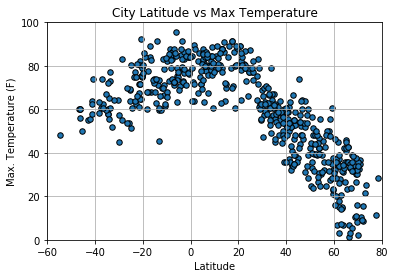

In [11]:
#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], marker='o',s=30, edgecolors= "black")
plt.title("City Latitude vs Max Temperature")

plt.ylim(0,100)
plt.xlim(-60, 80)

plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig("LAT VS TEMP.png")

#### Latitude vs. Humidity Plot

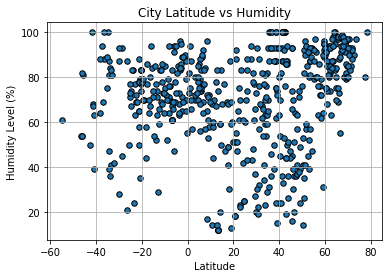

In [12]:

#create a Scatter Plot for Lattitude vs Humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS HUM.png')

#### Latitude vs. Cloudiness Plot

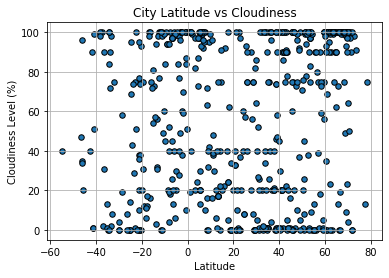

In [13]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness Level (%)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS CLOUD.png')

#### Latitude vs. Wind Speed Plot

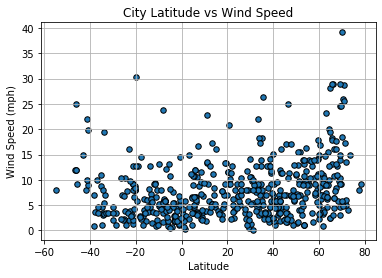

In [14]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], marker='o', s=30, edgecolors= "black")
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
# plt.show()

plt.savefig('LAT VS WIND.png')

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]>0.01]
southern_hemisphere = weather_dataframe.loc[weather_dataframe["Lat"]<-0.01]

# northern_hemisphere.head()
southern_hemisphere.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
2,mataura,35,1587176907,54,-46.19,168.86,60.01,11.99,NZ
3,lichinga,32,1587176944,71,-13.31,35.24,59.65,5.50,MZ
8,rikitea,1,1587176746,63,-23.12,-134.97,77.36,1.99,PF
10,beloha,0,1587176786,71,-25.17,45.05,69.04,2.30,MG
13,denpasar,20,1587176666,79,-8.65,115.22,87.80,4.70,ID


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

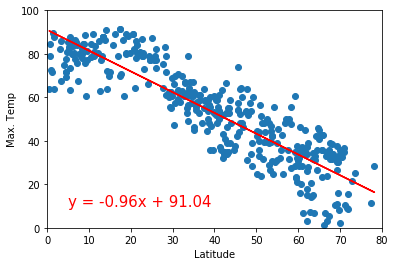

In [16]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")

plt.ylim(0,100)
plt.xlim(0, 80)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH MAX TEMP VS LAT.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

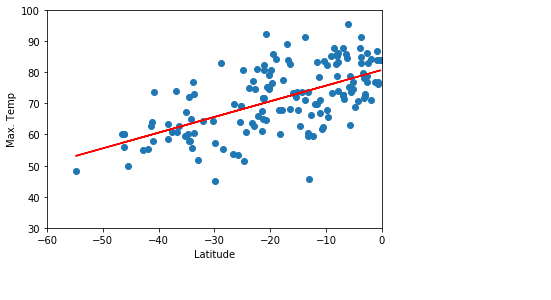

In [17]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.ylim(30, 100)
plt.xlim(-60, 0, 10)

plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH MAX TEMP VS LAT.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

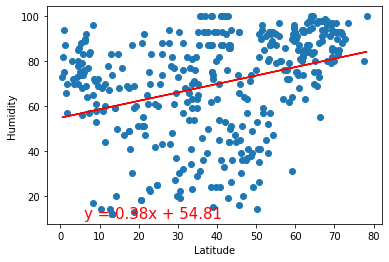

In [18]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH HUM VS LAT.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

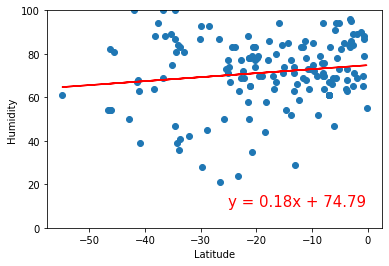

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

plt.ylim(0, 100)

plt.ylabel("Humidity")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH HUM VS LAT.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

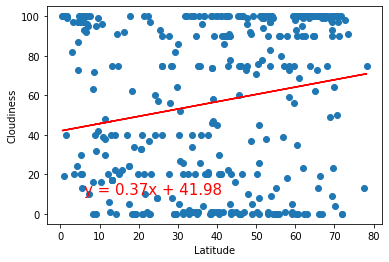

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH CLOUD VS LAT.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

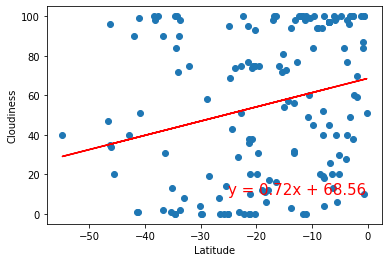

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH CLOUD VS LAT.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

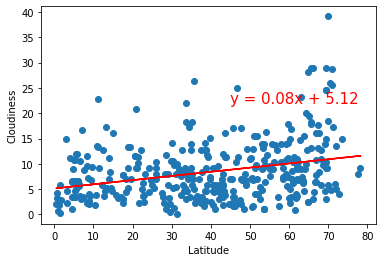

In [22]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,22),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("NORTH WIND VS LAT.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

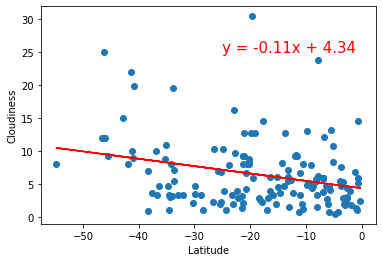

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
# plt.show()

plt.savefig("SOUTH WIND VS LAT.png")